### TP 1 - DL 
Ce TP vise à implémenter en Numpy des parties d’un réseau de neurones ainsi que
les fonctions d’entrainement et d’évaluation. Un squelette de code est disponible sur le
Gitlab d’AMU : [Gitlab d’AMU](https://etulab.univ-amu.fr/ayache/nnn_etu). Lisez les instructions
fournies dans le ReadMe pour comprendre l’architecture du code. Nous nous intéressons
ici à l’implémentation de réseaux de neurones composés de couches denses mais l’extension
à d’autres types de couches est tout à fait possible. Le jeu de données considéré est
un sous-ensemble (10000 données d’entrainement) de MNIST (images \(28 \times 28\) pixels
vectorisées) pour une tâche de classification multiclasses : $\mathbb{R}^{784} \rightarrow \mathbb{R}^{10}$.

# Notations
On considère les notations suivantes - similaires dans le code - pour un réseau dense à $L$
couches. $a^{l-1}$ est un vecteur en entrée d’une couche $l$ ($a^0 := x$ est un vecteur d’entrée du
réseau de neurones), $W^l$ est la matrice de poids et $b^l$ le vecteur de biais de la couche $l$
(pour $l \geq 1$).
On note $a^l$ le vecteur de préactivations de la couche $l$ et $z^l$ le vecteur des valeurs (post-
activations) en sortie de la fonction d’activation $g^l$. Les préactivations sont calculées
suivant $a^l = z^{l-1} W^{l^T} + b^l$ et les postactivations par $z^l = g^l(a^l)$. On note $n^l$
le nombre de neurones de la couche $l$. Le vecteur $a^l$ comme le vecteur $z^l$ sont donc des vecteurs dans
$\mathbb{R}^{n^l}$, on considère dans la suite que ce sont des vecteurs lignes. La matrice de poids de la
couche $l$, $W^l$, est une matrice de dimensions : $W^l \in \mathbb{R}^{n^l \times n^{l-1}}$.

## I. Formalisation de la backpropagation pour un exemple d’apprentissage
On utilise une fonction de coût $E$ qui renvoie le carré de la norme de la différence
entre la sortie du réseau $z^L$ et le vecteur cible $y$ (MSE).
On note $\delta E = \frac{\partial E}{\partial z^L}$ le gradient de la fonction de coût par rapport aux sorties du
réseau.
On note aussi $\delta^L = \frac{\partial E}{\partial a^L}$ le gradient de la fonction de coût par rapport aux activations
(avant passage par la fonction d’activation) de la couche de sortie du réseau et $\delta^l = \frac{\partial E}{\partial a^l}$
le gradient de la fonction de coût par rapport aux activations (avant passage par la
fonction d’activation) de la couche intermédiaire numéro $l$.

1. On s’intéresse à la couche de sortie du réseau de neurones. Dans le cas où
    la fonction d’activation est appliquée composante par composante (comme une
    sigmoide ou une ReLU) montrez que $\delta^L := \frac{\partial E}{\partial a^L} = \delta E \odot g'^L(a^L)$ où
    $\odot$ est le produit d’Hadamard, composante par composante.
2. Démontrez que pour une couche intermédiaire $l + 1$, en considérant un neurone
    de la couche $l + 1$, $i$, et un neurone de la couche $l$, $j$,
    $\frac{\partial a^{l+1}[i]}{\partial a^l[j]} = W^{l+1}[i, j]g'^l(a^l[j])$,
    en notant $u[j]$ la $j$-ième composante d’un vecteur $u$. En déduire que $\delta^l = [\delta^{l+1} \cdot W^{l+1}] \odot g'^l(a^l)$, où $\cdot$ est le produit matriciel.
3. Démontrez que le gradient de l’erreur par rapport aux poids de la couche $l$ s’écrit
    $\delta^l \cdot z^{T}_{l-1}$.
4. Exprimez la règle de descente de gradient pour les poids de la couche $l$.


## II. Extension de la formalisation au traitement d’un batch d’exemples
On considère ici que l’on traite l’ensemble des données par batch.
La fonction de coût E renvoie maintenant la moyenne sur un batch de l’écart entre
la sortie du réseau $z_L$ et un vecteur cible y. Ainsi $z_L$ est maintenant une matrice de
taille batch_size × $n_L$, al est une matrice de taille batch_size × $n_l$ etc.
Revisitez l’ensemble des questions de l’exercice précédent en vérifiant si les formules
sont toujours correctes ou en donnant des formules adaptées. Dans tous les cas
précisez les dimensions des quantités manipulées.

In [6]:
%cd "c:\Users\bausm\OneDrive\Documentos\IAM\TP\DL\NNN_v0\"


c:\Users\bausm\OneDrive\Documentos\IAM\TP\DL\NNN_v0


(10000, 784)

--- Epoch: 1 ---

Progress:
Batch 800 / 833, accuracy: 0.00%, validation accuracy: 0.00%, mean execution time per batch: 0.15 ms

--- Epoch: 2 ---

Progress:
Batch 800 / 833, accuracy: 0.00%, validation accuracy: 0.00%, mean execution time per batch: 0.15 ms

--- Epoch: 3 ---

Progress:
Batch 800 / 833, accuracy: 0.00%, validation accuracy: 0.00%, mean execution time per batch: 0.15 ms

--- Epoch: 4 ---

Progress:
Batch 800 / 833, accuracy: 0.00%, validation accuracy: 0.00%, mean execution time per batch: 0.15 ms

--- Epoch: 5 ---

Progress:
Batch 800 / 833, accuracy: 0.00%, validation accuracy: 0.00%, mean execution time per batch: 0.16 ms

--- Epoch: 6 ---

Progress:
Batch 800 / 833, accuracy: 0.00%, validation accuracy: 0.00%, mean execution time per batch: 0.15 ms

--- Epoch: 7 ---

Progress:
Batch 800 / 833, accuracy: 0.00%, validation accuracy: 0.00%, mean execution time per batch: 0.16 ms

--- Epoch: 8 ---

Progress:
Batch 800 / 833, accuracy: 0.00%, validation acc

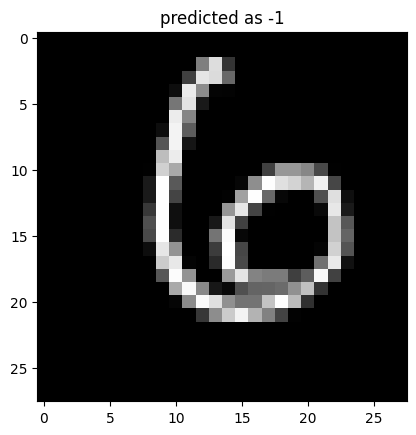

In [14]:
%run -i "main.py"

## III. Programmation de la boucle d’apprentissage du réseau de neurones

Commencez par une lecture globale des différents fichiers pour comprendre l’architecture du code et l’enchainement des appels de fonctions. Cette partie se concentre sur le fichier 'neural_network.py'.

1. La fonction fit est la fonction d’entrainement du réseau de neurones. A chaque
epoch, l’ensemble du jeu d’entrainement est (rétro)propagé pour mettre à jour
les paramètres du réseau. Complétez les parties manquantes de la fonction en
suivant les étapes commentées dans le code.

In [12]:
from cost_functions import cost_functions
from optimizers import optimizers
from layers.dense import Dense
from utils import generate_batches

import numpy as np
from pathlib import Path
from time import perf_counter


class NeuralNetwork:

    def __init__(self,
                 architecture=None,
                 optimizer="sgd",
                 cost_function="mse"
                 ) -> None:

        # ----- CLASSIFICATION ATTRIBUTES -----
        self.layers: list = []
        self.classes: dict = None

        # ----- HYPER-PARAMETERS -----
        self.batch_size: int = 32
        self.number_of_epochs: int = 10
        self.optimizer = optimizers[optimizer]()
        self.cost_function = cost_functions[cost_function]()

        self.initialize_architecture(architecture)

In [11]:
def fit(self,
              x: np.array,
              y: np.array,
              validation_data: np.array = None,
              validation_data_labels: np.array = None,
              learning_rate: float = None,
              epochs: int = 5,
              batch_size: int = 50) -> None:
        """
        This method trains the network. It takes an input vector and a label vector.
        If no validation data is passed, the method keeps 10% of the training data to serve as validation data.

        :param x: an array of input vectors
        :param y: an array of label vectors
        :param validation_data: an array of input vectors to measure the network validation accuracy throughout the
        training session
        :param validation_data_labels: an array of label vectors to measure the network validation accuracy throughout
        the training session
        :param learning_rate: a float used to define the learning rate of the optimizer
        :param epochs: redefine the number of epochs for the network to be trained on
        :param batch size: redefine the size of the batches use for training
        :return: None
        """

        # set class attributes
        self.number_of_epochs = epochs
        self.batch_size = batch_size


        # sets the learning of the optimizer if passed as an argument
        if learning_rate is not None:
            self.optimizer.learning_rate = learning_rate
        
        # create batches iterator as a generator
        batches = generate_batches(x, y, self.batch_size)
        
        ############                ############
        ############ begin training ############
        ############                ############
        
        # looping over epochs
        for epoch in range(self.number_of_epochs):

            print(f"\n--- Epoch: {epoch + 1} ---\n")
            print("Progress:")

            timings = []

            # looping over batches
            for batch in range(x.shape[0] // self.batch_size):

                start = perf_counter()

                # get a random batch
                x_batch, y_batch = next(batches)

                # calculate output of the network for the given input
                output = self.forward(x_batch)
                # backpropagate the error through the whole network
                self.backward(y_batch, output)
                
                # update the weights and biases of the network
                self.update_parameters()
                
                timings.append(perf_counter() - start)

                if batch % 100 == 0:
                    # Monitoring training session
                    print(f"Batch {batch} / {x.shape[0] // self.batch_size}, "
                          f"accuracy: {100 * self.evaluate(x, y):.2f}%, "
                          f"validation accuracy: {100 * self.evaluate(validation_data, validation_data_labels):.2f}%, "
                          f"mean execution time per batch: {1000 * np.mean(timings):.2f} ms",
                          end="\r")

            print("\n", end="")

2. Complétez la fonction backpropagation en reprenant les formules rappelées plus
haut.

In [13]:
def backpropagation(self, y: np.array, expected_output: np.array) -> None:
    """
    This method computes the error that propagates through each layer of the network.

    :param y: an array of size batch_size containing output vectors computed through inference an array of size batch_size containing output vectors computed through inference
    :param expected_output: an array of size batch_size containing the desired output for each input vector
    :return: None
    """
    # compute deltaE (TD notation)
    deltaE = self.cost_function.derivative(y, expected_output)
    # propagate the error from the last layer
    delta_i = self.layers[-1].propagate_backward(deltaE)
    # call recursive deltas from before last to first
    for layer in self.layers[-2::-1]:
        delta_i = layer.propagate_backward(delta_i)
